###### Data description :
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

The task is to examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

###### Importing Libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Importing the dataset:

In [3]:
data=pd.read_csv("Telecom_customer_churn.csv")

In [4]:
pd.set_option('display.max_columns', None)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

    > By looking at the data, the target variable is categorical value, hence we go for classification problem
    > There is no null values in the dataset.
    > Most of the columns are categorical data except tenure and MonthlyCharges
    > TotalCharges is tenure times MonthlyCharges
    > customerID is alphanumerica value which can be dropped as it does not have any information

###### Data Preprocessing :

In [8]:
#Lets check all the unique values and value counts of the categorical data

for col in data.columns:
    print("Value counts for column :",col)
    print(data[col].value_counts())
    print('\n')

Value counts for column : customerID
1343-EHPYB    1
9625-QNLUX    1
6366-ZGQGL    1
9916-AYHTC    1
7382-DFJTU    1
             ..
2750-BJLSB    1
3063-QFSZL    1
9150-KPBJQ    1
5451-YHYPW    1
6833-JMZYP    1
Name: customerID, Length: 7043, dtype: int64


Value counts for column : gender
Male      3555
Female    3488
Name: gender, dtype: int64


Value counts for column : SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Value counts for column : Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Value counts for column : Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


Value counts for column : tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Value counts for column : PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


Value counts for column : MultipleLines
No                  3390
Yes                 297

In [9]:
data.drop(["customerID"], axis=1, inplace=True)

As we see above, the dataset doesnot have any missing values in it.

TotalCharges column has empty values this needs to be handled. TotalCharges is the product of tenure and MonthlyCharges, so we can easity predict the empty values. 

In [10]:
print(data[data["tenure"]==0]) #data with tenure is 0

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [11]:
print(data[data["TotalCharges"]==" "]) #data with TotalCharges is empty

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

These are empty as the corresponding tenure values are 0. So we can directly fill MonthlyCharges values in place of empty cells.

In [12]:
data["TotalCharges"]=np.where((data["tenure"]==0), data["MonthlyCharges"].values,data["TotalCharges"])

In [13]:
#Lets convert the "TotalCharges" column to float type
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [14]:
print(data[data["tenure"]==0]) #data with tenure is 0

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


###### Data Visualization :

In [16]:
data.keys()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Lets plot all the feature dataset with target set to understand if the feature set directly affects the target variable

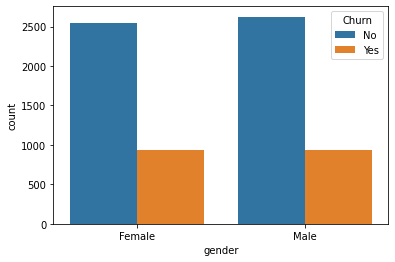

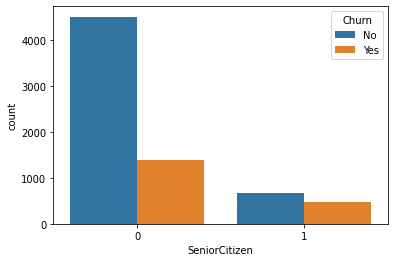

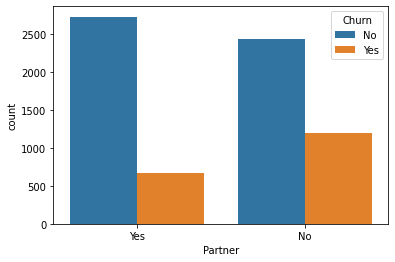

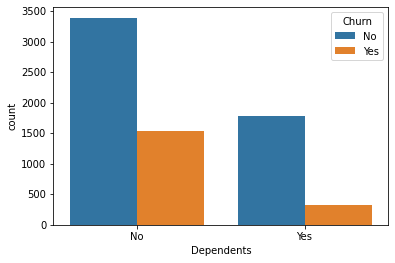

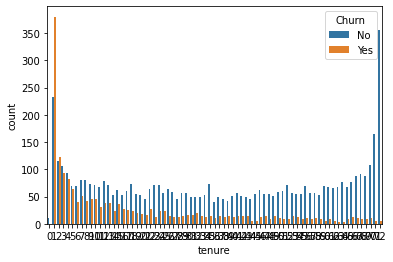

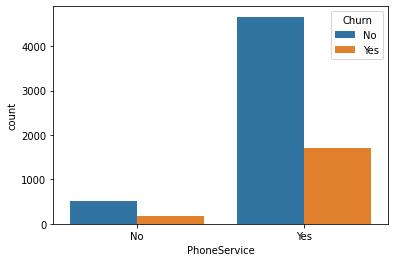

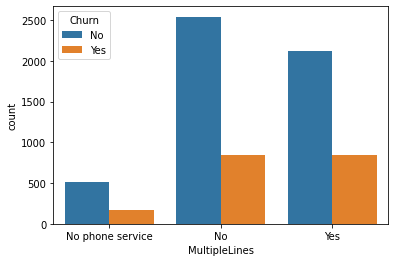

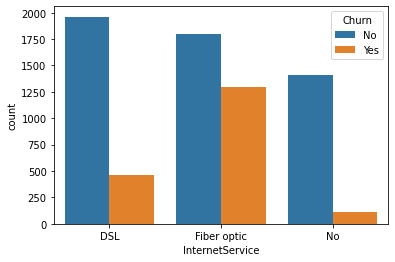

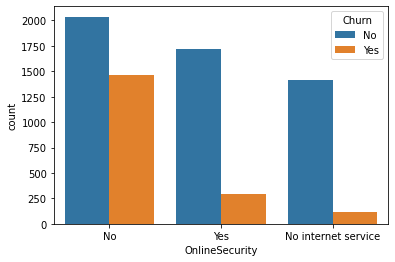

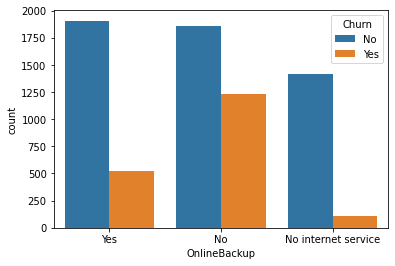

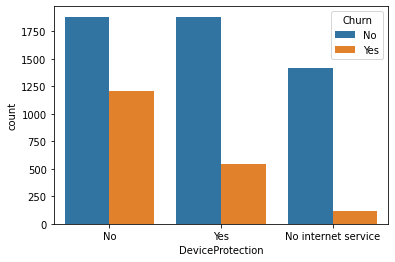

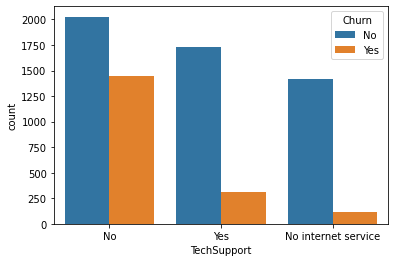

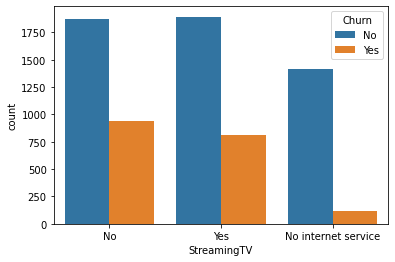

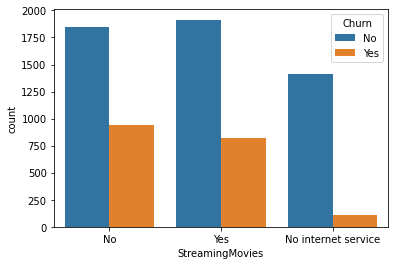

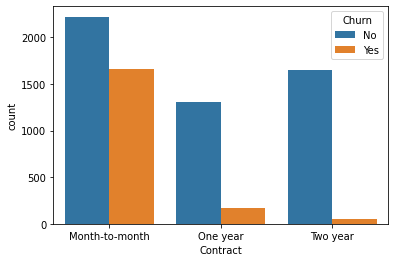

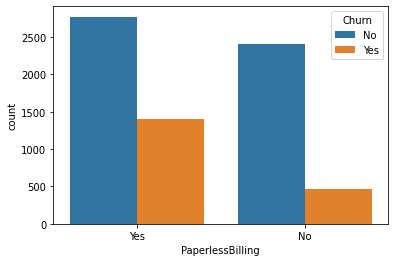

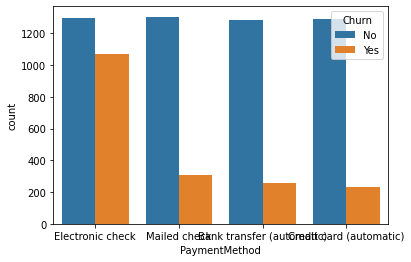

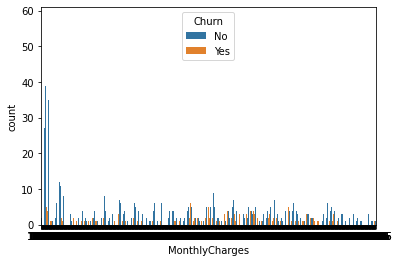

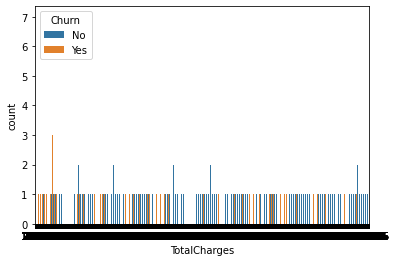

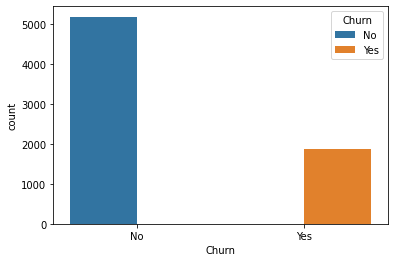

In [17]:
for i in data.keys():
    sns.countplot(x=i, data=data, hue="Churn")
    plt.show()

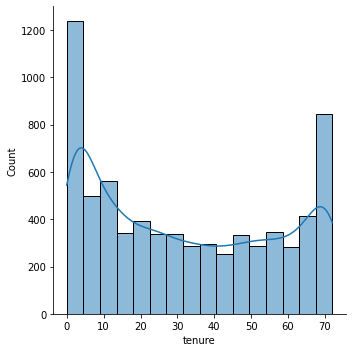

In [18]:
sns.displot(data["tenure"], kde=True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

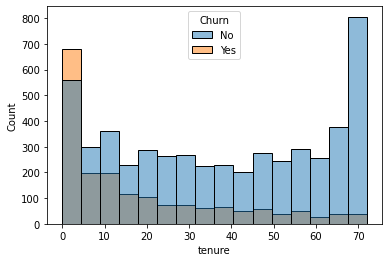

In [19]:
sns.histplot(x=data["tenure"], hue=data["Churn"], data=data)

We can infer that whover has less tenure are more prone for the Churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

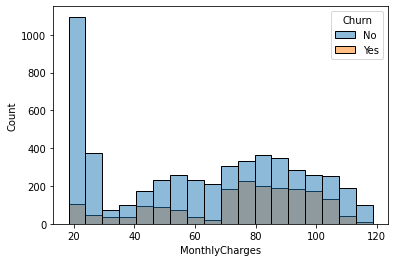

In [20]:
sns.histplot(x=data["MonthlyCharges"], hue=data["Churn"], data=data)

Higher the monthly charge, customer churn is higher.

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

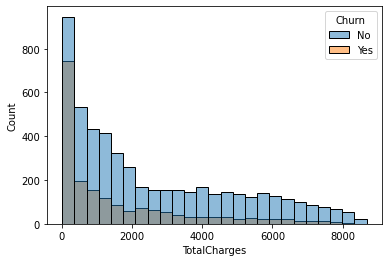

In [21]:
sns.histplot(x=data["TotalCharges"], hue=data["Churn"], data=data)

###### OrdinalEncoder:

In [22]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


###### Correlation Matrix :
    Lets check the correlation between feature set and target set

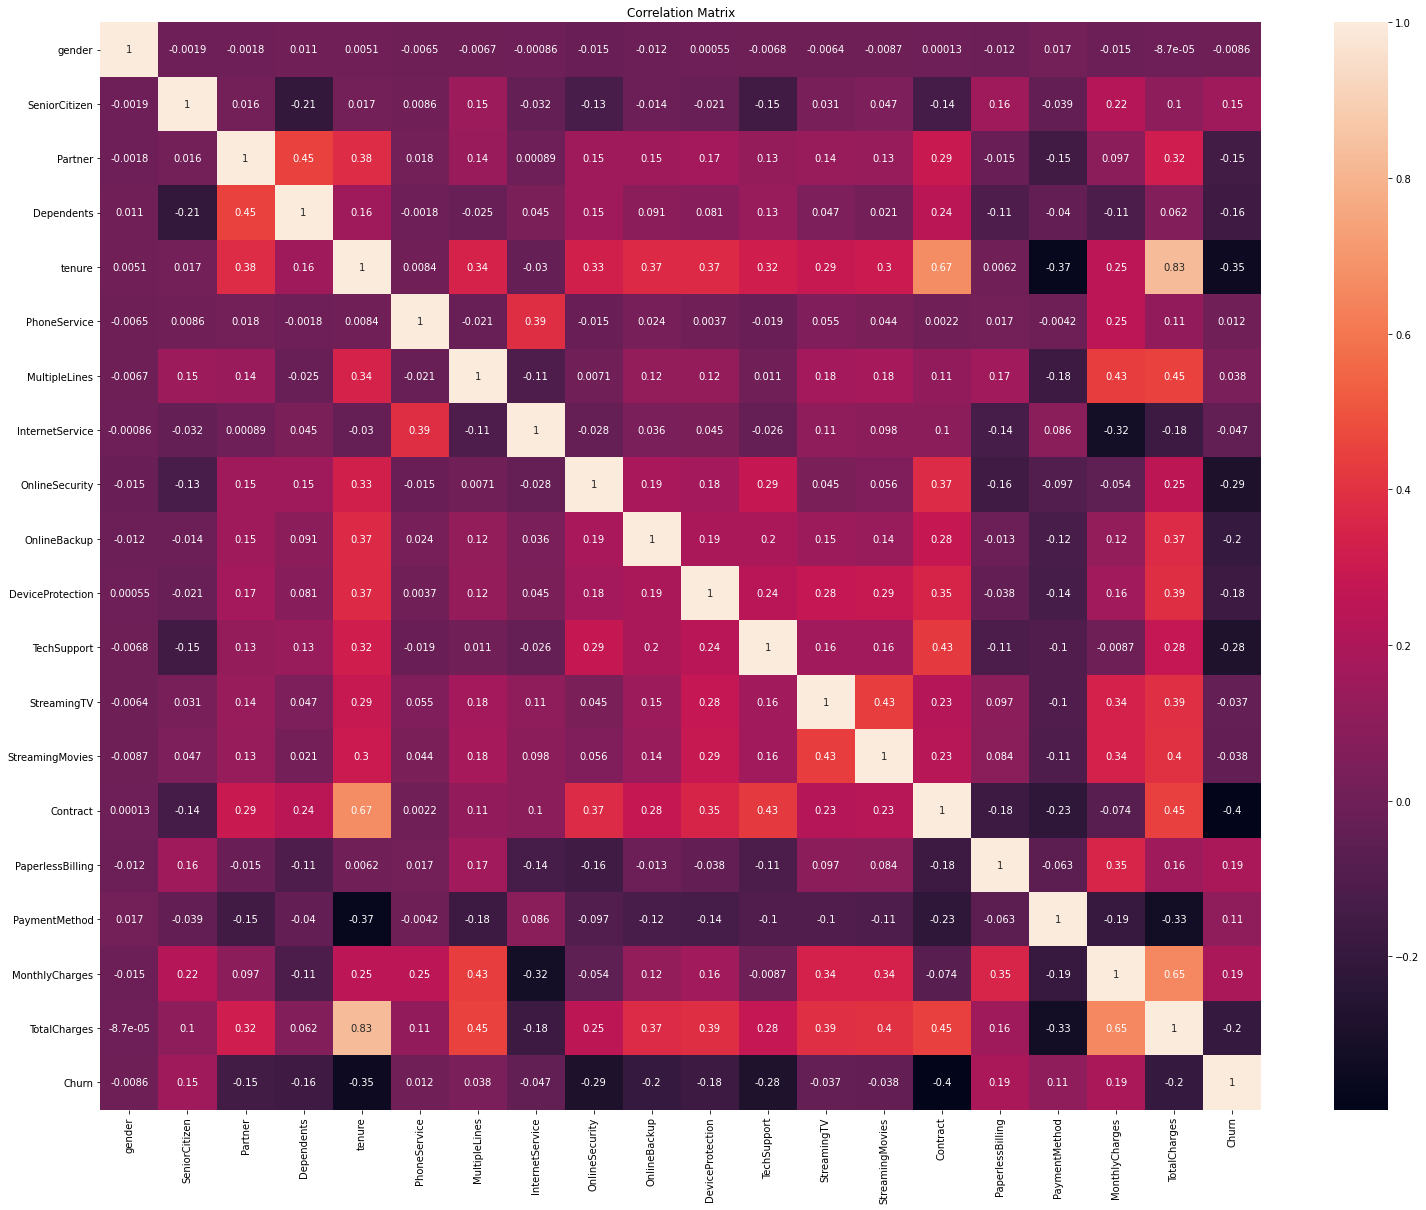

In [24]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(method='pearson'), annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.show()

In [25]:
cor_mat=data.corr()

In [26]:
cor_mat["Churn"].sort_values(ascending=True)

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198347
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

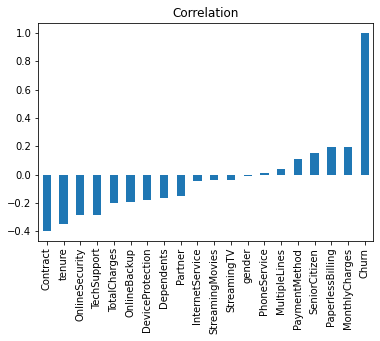

In [27]:
cor_mat["Churn"].sort_values(ascending=True).plot(kind='bar')
plt.title("Correlation")
plt.show()

Contract, Tenure, OnlineSecurity, Techsupport etc have high correlation with Target variable Churn.
Gender and PhoneService has very very minimal correlation with Churn

In [28]:
#Lets split our data into feature set x and target set y.

x = data.drop(["Churn"], axis=1)
y = data["Churn"]

In [29]:
x.shape, y.shape

((7043, 19), (7043,))

###### Train Test Split:
    Lets split our data into train set and test set.

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [31]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5634, 19) (1409, 19) (5634,) (1409,)


###### MinMax Scaling :
    Lets scale our data to bring all the datasets to similar scale.

In [32]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1814,1.0,0,1.0,1.0,12,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,19.70,258.35
5946,0.0,0,0.0,0.0,42,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,73.90,3160.55
3881,1.0,0,1.0,0.0,71,1.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,65.15,4681.75
2389,1.0,0,1.0,1.0,71,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,85.45,6300.85
3676,1.0,0,0.0,0.0,30,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,70.40,2044.75


In [33]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

###### Model Building:

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [35]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
gnb=GaussianNB()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

model=[lr, dtc, knn, svc, gnb, rfc, abc, gbc]

In [36]:
for m in model:
    m.fit(x_train, y_train)
    pred_m=m.predict(x_test)
    acc_m=accuracy_score(y_test, pred_m)
    fpr,tpr,thresholds=roc_curve(y_test,pred_m)
    auc_score=roc_auc_score(y_test,pred_m)
    print('Accuracy Score of',m,'is :',acc_m)
    print("Confusion_Matrix",confusion_matrix(y_test,pred_m))
    print("Classification_Report", classification_report(y_test,pred_m))
    print("auc_score", auc_score)
    print('\n')

Accuracy Score of LogisticRegression() is : 0.8076650106458482
Confusion_Matrix [[937 124]
 [147 201]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1061
         1.0       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

auc_score 0.7303576651824888


Accuracy Score of DecisionTreeClassifier() is : 0.7338537970191625
Confusion_Matrix [[860 201]
 [174 174]]
Classification_Report               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1061
         1.0       0.46      0.50      0.48       348

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.74      1409

auc_score 0.655278039585297


Accuracy Score of KNeighborsCla

###### Cross validation :

In [38]:
from sklearn.model_selection import cross_val_score

for m in model:
    cvs=cross_val_score(m,x_train,y_train,cv=3)
    print(cvs )
    print("accuracy of the model", m, "is ",cvs.mean())
    print("\n")

[0.79925453 0.80085197 0.79605964]
accuracy of the model LogisticRegression() is  0.7987220447284344


[0.7284345  0.72097977 0.71458999]
accuracy of the model DecisionTreeClassifier() is  0.7213347532836352


[0.76198083 0.7571885  0.7428115 ]
accuracy of the model KNeighborsClassifier() is  0.7539936102236422


[0.78647497 0.79765708 0.79020234]
accuracy of the model SVC() is  0.7914447994320198


[0.76357827 0.74547391 0.73535676]
accuracy of the model GaussianNB() is  0.748136315228967


[0.7971246  0.78647497 0.78700745]
accuracy of the model RandomForestClassifier() is  0.7902023429179978


[0.80724175 0.80457934 0.7742279 ]
accuracy of the model AdaBoostClassifier() is  0.7953496627618034


[0.79925453 0.79978701 0.7827476 ]
accuracy of the model GradientBoostingClassifier() is  0.7939297124600638




With Cross Validation, Logistic Regression is performing well compared to all other Models with accuracy score of 79.87%. 

###### Hyper Parameter Tuning :

In [51]:
from sklearn.model_selection import GridSearchCV

param={'C' : [1000, 100, 10, 1.0, 0.1, 0.01],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

GCV=GridSearchCV(lr, param, refit=True, cv=3, verbose=2)
GCV.fit(x_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ...........................C=1000, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=1000, solver=newton-cg; total time=   0.0s
[CV] END ...........................C=1000, solver=newton-cg; total time=   0.0s
[CV] END ...............................C=1000, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=1000, solver=lbfgs; total time=   0.0s
[CV] END ...............................C=1000, solver=lbfgs; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END ...........................C=1000, solver=liblinear; total time=   0.0s
[CV] END .................................C=1000, solver=sag; total time=   0.0s
[CV] END .................................C=1000, solver=sag; total time=   0.0s
[CV] END .................................C=1000

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [52]:
print("Best Parameters : ",GCV.best_params_)
print("Best Estimator : ",GCV.best_estimator_)

Best Parameters :  {'C': 100, 'solver': 'newton-cg'}
Best Estimator :  LogisticRegression(C=100, solver='newton-cg')


In [53]:
GCV_pred=GCV.predict(x_test)
print(classification_report(y_test,GCV_pred))
print("Accuracy Score :",accuracy_score(y_test,GCV_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1061
         1.0       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409

Accuracy Score : 0.8090844570617459


Applying test set to the model, we have got 81% of accuracy score. Lets save this model.

###### Saving the best Model : 

In [54]:
import joblib
joblib.dump(GCV.best_estimator_,"Customer_Churn_Analysis.obj")

['Customer_Churn_Analysis.obj']